# Lezione 1
## Dario Pullia

### Esercizio 01.1

Il corso inizia testando la bontà del generatore di numeri casuali fornitoci. 

A tal scopo, estraendo a caso valori nel range \[0,1\) e calcolandone la media, valutiamo l'integrale $$\langle r \rangle = \int_0^1 r dr = 1/2$$ e la sua deviazione standard $$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$.

Infine calcoliamo anche il valore di $\chi^2$ $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ attendendoci un valore di $(n_i - n/M)^2 \simeq n/M \Rightarrow \chi^2=100$. Valori molto superiori a questo implicano una mancata uniformità nei valori estratti.


Introduciamo subito la tecnica del **data blocking**.
Il data blocking è una tecnica che consente di dividere il carico computazionale in sottoproblemi separati, portando diversi benefici, tra cui:
- La possibilità di salvare i progressi *run time*, proteggendosi in caso di blackout che altrimenti risulterebbero catastrofici.
- La possibilità di riprendere una simulazione interrotta in precedenza per migliorarne la precisione.
- La possibilità di fare calcolo parallelo su diversi processori riducendo i tempi di esecuzione a parità di operazioni eseguite.


L'implementazione del data blocking è molto semplice: 
- Si decidono due (perchè chiaramente M=N*L) parametri tra M (=numero totale di passi), N (=numero di blocchi) ed L (=numero di passi per blocco).

- Si ripete per N blocchi: 
    - Si ripete l'operazione casuale L volte, accumulando i valori estratti e i valori estratti al quadrato.
    - Si aggiorna la media progressiva e la sua deviazione standard della media. 
    - Si salva su file il progresso raggiunto.

I parametri scelti sono: $$M=100000, N=100$$
Di seguito, nell'ordine, il valore dell'integrale, il valore della deviazione standard (meno il valore atteso), e il $\chi^2$ dei valori in ogni blocco. In rosso sono riportati i valori attesi.

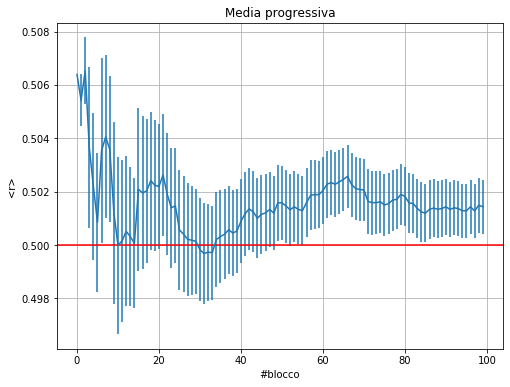

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy



N=100
ave_prog, err_prog, save_prog, serr_prog, chi2 = np.loadtxt("data01/data01.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,ave_prog,yerr=err_prog)
plt.title('Media progressiva')
plt.xlabel('#blocco')
plt.ylabel('<r>')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

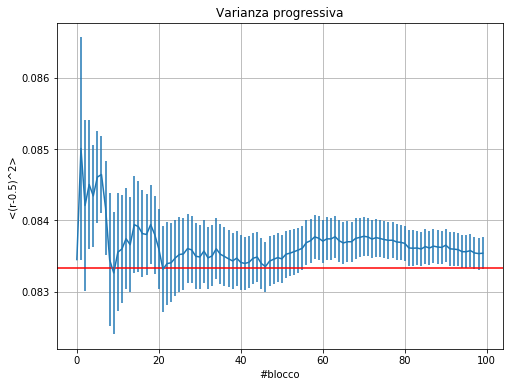

<Figure size 432x432 with 0 Axes>

In [17]:
fig=plt.figure(figsize=(8, 6))
plt.errorbar(x,save_prog,yerr=serr_prog)
plt.title('Varianza progressiva')
plt.xlabel('#blocco')
plt.ylabel('<(r-0.5)^2>')
plt.axhline(y = 1/12, color = 'r', linestyle = '-')
plt.grid(True)
plt.figure(figsize=(6,6))
plt.show()

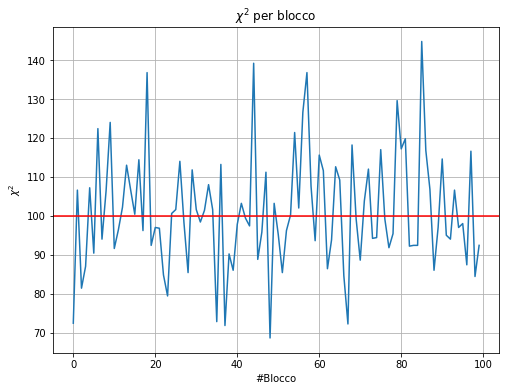

<Figure size 432x432 with 0 Axes>

In [18]:
fig=plt.figure(figsize=(8, 6))
plt.plot(x,chi2)
plt.title('$\chi^2$ per blocco')
plt.xlabel('#Blocco')
plt.ylabel('$\chi^2$')
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.grid(True)
plt.figure(figsize=(6,6))
plt.show()

Osserviamo che i valori della media e della deviazione standard sono compatibili con i valori attesi. Il test del $\chi^2$ potrebbe a prima vista far dubitare dei risultati, ma in realtà oscillazioni del genere sono previste dalla teoria stessa che di sua natura prevende randomicità. 

### Esercizio 01.2

Verificata la bontà del generatore di numeri casuali, verifichiamo il **Teorema del limite centrale**.

Il Teorema dice che la media di un gran numero di valori indipendenti estratti casualmente da ogni distribuzione, **purchè di varianza finita**, tenda ad assumere una forma gaussiana.

Per dimostrare ciò estraiamo casualmente numeri da una specifica distribuzione dividendo le estrazioni in blocchi di dimensione L=1,2,10,100. Ripetiamo il processo per N=10000 blocchi e ne plottiamo in un istogramma la distribuzione finale. 

Ripetiamo l'operazione nel caso di distribuzione uniforme, lorentziana ed esponenziale.

Come si generano numeri con distribuzione esponenziale e lorentziana?

Per questi rari casi semplici possiamo usare la tecnica della **inversione della cumulativa**.
Questa tecnica permette di ottenere valori di x in una distribuzione che risulta in y=F(x) estraendo in modo uniforme valori di y in \[0,1\) ed inserendoli nell'inversa della funzione cumulativa.
$$ F(x) = \int_{0}^{x}p(x')dx'=:y \Rightarrow x= F^{-1}(y)$$

Per i nostri interessi:
- **Distribuzione esponenziale** $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty] \Rightarrow x=-\frac{1}{\lambda}\ln(1-y)$, $y\in [0;1)$
- **Distribuzione lorentziana** $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty] \Rightarrow x=\Gamma \tan [\pi (y-\frac{1}{2})] +\mu$, $y\in [0;1)$


Text(0.5, 0, 'x')

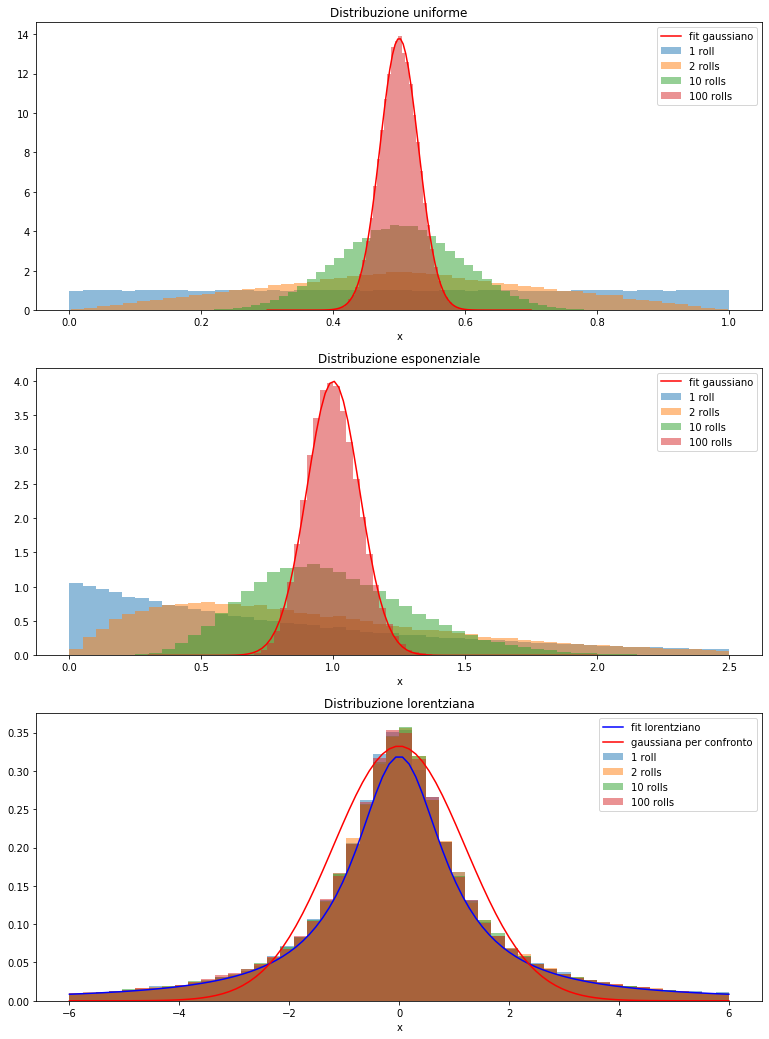

In [24]:
unif1, unif2, unif10, unif100, exp1, exp2, exp10, exp100,lorentz1, lorentz2, lorentz10, lorentz100 = np.loadtxt("data02/data02.dat", usecols=(0,1,2,3,4,5,6,7,8,9,10,11), delimiter=' ', unpack='true')
n_bins=50

fig, axs = plt.subplots(3,figsize=(13,18))

#PRIMA FIGURA
axs[0].hist(unif1, n_bins, alpha=0.5, label='1 roll', density='true')
axs[0].hist(unif2, n_bins, alpha=0.5, label='2 rolls', density='true')
axs[0].hist(unif10, n_bins, alpha=0.5, label='10 rolls', density='true')
axs[0].hist(unif100, n_bins, alpha=0.5, label='100 rolls', density='true')

parameter = norm.fit(unif100) # fit normale
x = np.linspace(0.3,0.7, 100) # estremi di x, passi
y = norm.pdf(x, *parameter) # calcola p(x)
axs[0].plot(x, y, color = 'r', linestyle = '-',label='fit gaussiano', alpha = 1)
axs[0].legend(loc='upper right')
axs[0].set_title('Distribuzione uniforme')
axs[0].set_xlabel('x')


#SECONDA FIGURA
axs[1].hist(exp1, n_bins, alpha=0.5, label='1 roll',range=(0,2.5), density='true')
axs[1].hist(exp2, n_bins, alpha=0.5, label='2 rolls',range=(0,2.5), density='true')
axs[1].hist(exp10, n_bins, alpha=0.5, label='10 rolls',range=(0,2.5), density='true')
axs[1].hist(exp100,2*n_bins, alpha=0.5, label='100 rolls',range=(0,2.5), density='true')

parameter = norm.fit(exp100) # fit normale 
x = np.linspace(0.3,2, 100) # estremi di x, passi
y = norm.pdf(x, *parameter) # calcola p(x)
axs[1].plot(x, y, color = 'r', linestyle = '-',label='fit gaussiano', alpha = 1)
axs[1].legend(loc='upper right')
axs[1].set_title('Distribuzione esponenziale')
axs[1].set_xlabel('x')

#TERZA FIGURA
axs[2].hist(lorentz1, n_bins, alpha=0.5, label='1 roll',range=(-6,6), density='true')
axs[2].hist(lorentz2, n_bins, alpha=0.5, label='2 rolls',range=(-6,6), density='true')
axs[2].hist(lorentz10, n_bins, alpha=0.5, label='10 rolls',range=(-6,6), density='true')
axs[2].hist(lorentz100, n_bins, alpha=0.5, label='100 rolls',range=(-6,6), density='true')

parameter = cauchy.fit(lorentz100) # fit lorentziano
x = np.linspace(-6,6, 100) # estremi di x, passi
y = cauchy.pdf(x, *parameter) # calcola p(x)
axs[2].plot(x, y, color = 'b', linestyle = '-',label='fit lorentziano', alpha = 1)
y = norm.pdf(x, *(0,1.2)) #Per confronto, disegno sopra una gaussiana. I parametri sono messi "ad occhio"

axs[2].plot(x, y, color = 'r', linestyle = '-',label='gaussiana per confronto', alpha = 1)
axs[2].legend(loc='upper right')
axs[2].set_title('Distribuzione lorentziana')
axs[2].set_xlabel('x')





Come previsto, i blocchi di dimensione 1 ricalcano la distribuzione da cui sono estratti. Al contrario i blocchi di dimensione 100 risultano convergere a distribuzioni gaussiane sia nel caso uniforme sia nel caso esponenziale. Il caso lorentziano non converge a una distribuzione gaussiana perchè non rispetta le ipotesi del Teorema! Infatti è una distribuzione con **varianza infinita**. 


### Esercizio 01.3

Infine stimiamo il valore di $\pi$ utilizzando la tecnica di Buffon.

L'idea alla base di questo esperimento simulato prevede il lancio di bastoncini lunghi l in maniera completamente casuale su un pavimento segnato da linee parallele a distanza d (necessariamente d>l). 

La probabilità che un bastoncino intersechi una linea è $$P=\frac{2l}{d\pi}$$.

Con un alto numero M di lanci (ovviamente diviso in N blocchi!) il rapporto $\frac{N_{hit}}{N_{tot}}$ tende alla probabilità P da cui si ottiene il valore di $\pi$.
Questo esercizio lancia la sfida di estrarre casualmente l'orientamento finale del bastoncino **senza usare il valore vero di $\pi$**.

Fissati d=5 e l=4, la simulazione funziona come segue:
- Si estrae la coordinata y del centro in modo uniforme tra 0 e 100 (numero arbitrario giudicato abbastanza grande).
- Si estrae una coppia (x,y) uniformemente all'interno di un quadrato di lato 4. Se la distanza del punto dal centro è minore di 2, allora si accetta il punto e lo si proietta sulla circonferenza.
- Si controlla se il bastoncino interseca una linea e si aggiorna il numero $\frac{N_{hit}}{N_{tot}}$. 

Sono stati eseguiti M=1000000 lanci divisi in 100 blocchi.

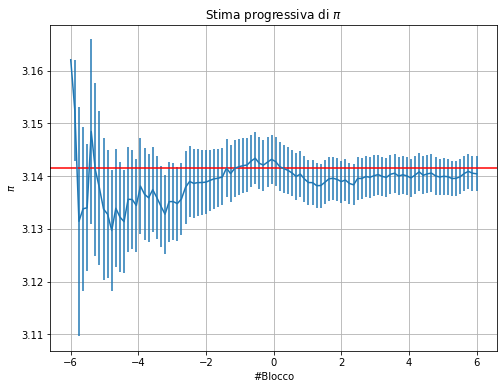

In [26]:
pi, sigmapi = np.loadtxt("data03/data03.dat", usecols=(0,1), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(8, 6))
plt.errorbar(x,pi,yerr=sigmapi)
plt.title('Stima progressiva di $\pi$')
plt.xlabel('#Blocco')
plt.ylabel('$\pi$')
plt.axhline(y = np.pi , color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

La misura è compatibile con il valore vero di $\pi$